In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\limch\OneDrive\Desktop\Data Viz project\Billionaires Statistics Dataset.csv")
df.country.fillna(df.countryOfCitizenship, inplace=True)
df[df['country'].isna()]

Empty DataFrame
Columns: [rank, finalWorth, category, personName, age, country, city, source, industries, countryOfCitizenship, organization, selfMade, status, gender, birthDate, lastName, firstName, title, date, state, residenceStateRegion, birthYear, birthMonth, birthDay, cpi_country, cpi_change_country, gdp_country, gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, population_country, latitude_country, longitude_country]
Index: []

[0 rows x 35 columns]

In [10]:
import matplotlib.pyplot as plt
newer_df = df.groupby(['country']).size().reset_index(name='Number of Billionaires')
newer_df = newer_df.sort_values(by=['Number of Billionaires'],ascending=False)
newer_df = newer_df.head(10)
newer_df

country  Number of Billionaires
75   United States                     755
16           China                     523
31           India                     160
26         Germany                     112
74  United Kingdom                      84
59          Russia                      79
66     Switzerland                      78
29       Hong Kong                      68
35           Italy                      57
67          Taiwan                      46

In [26]:
newer_df['Country GDP'] = [21427700000000,19910000000000,2611000000000,3845630030824,2827113184696,1699876578871,703082435360,385000000000,2001244392042,700000000000]
newer_df['Share of World GDP'] = [25.32,17.86,3.37,4.05,3.05,2.23,0.80,0.31,2.00,0.96]
newer_df

country  Number of Billionaires     Country GDP  Share of World GDP
75   United States                     755  21427700000000               25.32
16           China                     523  19910000000000               17.86
31           India                     160   2611000000000                3.37
26         Germany                     112   3845630030824                4.05
74  United Kingdom                      84   2827113184696                3.05
59          Russia                      79   1699876578871                2.23
66     Switzerland                      78    703082435360                0.80
29       Hong Kong                      68    385000000000                0.31
35           Italy                      57   2001244392042                2.00
67          Taiwan                      46    700000000000                0.96

In [22]:
newer_df['country']

75     United States
16             China
31             India
26           Germany
74    United Kingdom
59            Russia
66       Switzerland
29         Hong Kong
35             Italy
67            Taiwan
Name: country, dtype: object

[]

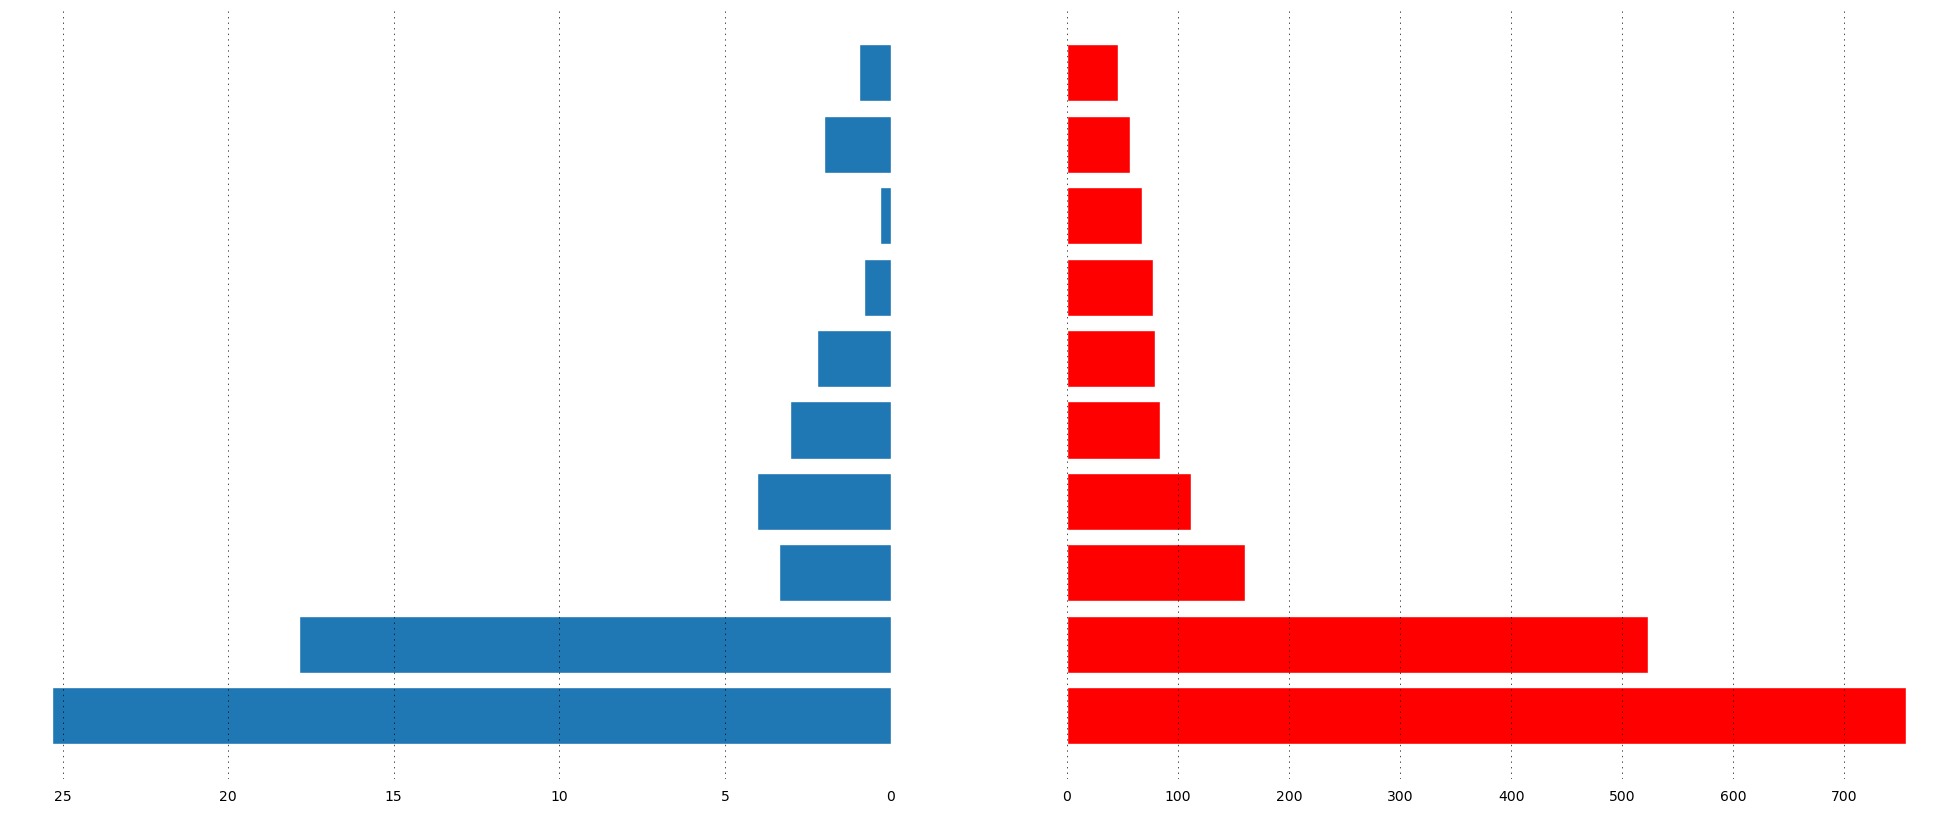

In [59]:
import matplotlib.pyplot as plt

y_pos = np.arange(len(newer_df['country']))
fig, (axs1,axs2) = plt.subplots(1,2, figsize=(25, 10),sharey = True)
axs2.barh(y_pos,newer_df['Number of Billionaires'],color = 'red',edgecolor = 'white')
axs1.barh(y_pos,newer_df['Share of World GDP'],edgecolor = 'white')
axs2.set_yticks(y_pos,newer_df['country'])
axs1.invert_xaxis()
axs1.get_yaxis().set_ticks([])

In [1]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\limch\OneDrive\Desktop\Data Viz project\Billionaires Statistics Dataset.csv")

mean_wealth = df.groupby('category')['finalWorth'].median().reset_index()
mean_wealth = mean_wealth.rename(columns={'finalWorth': 'Median Net Worth'})
mean_wealth


category  Median Net Worth
0                   Automotive            2600.0
1   Construction & Engineering            2100.0
2                  Diversified            2300.0
3                       Energy            2450.0
4             Fashion & Retail            2500.0
5        Finance & Investments            2600.0
6              Food & Beverage            2500.0
7           Gambling & Casinos            2800.0
8                   Healthcare            2100.0
9                    Logistics            3000.0
10               Manufacturing            2000.0
11       Media & Entertainment            2500.0
12             Metals & Mining            2600.0
13                 Real Estate            2300.0
14                     Service            2600.0
15                      Sports            2100.0
16                  Technology            2200.0
17                     Telecom            2800.0

In [3]:
num = df.groupby('category').size().reset_index(name = 'Number')
num


category  Number
0                   Automotive      73
1   Construction & Engineering      45
2                  Diversified     187
3                       Energy     100
4             Fashion & Retail     266
5        Finance & Investments     372
6              Food & Beverage     212
7           Gambling & Casinos      25
8                   Healthcare     201
9                    Logistics      40
10               Manufacturing     324
11       Media & Entertainment      91
12             Metals & Mining      74
13                 Real Estate     193
14                     Service      53
15                      Sports      39
16                  Technology     314
17                     Telecom      31

In [4]:
mean_wealth = mean_wealth.merge(num, on = 'category')
total = mean_wealth['Number'].sum()
mean_wealth['percentage'] = mean_wealth['Number']/total*100
mean_wealth['percentage'] = mean_wealth['percentage'].round(2)
mean_wealth

category  Median Net Worth  Number  percentage
0                   Automotive            2600.0      73        2.77
1   Construction & Engineering            2100.0      45        1.70
2                  Diversified            2300.0     187        7.08
3                       Energy            2450.0     100        3.79
4             Fashion & Retail            2500.0     266       10.08
5        Finance & Investments            2600.0     372       14.09
6              Food & Beverage            2500.0     212        8.03
7           Gambling & Casinos            2800.0      25        0.95
8                   Healthcare            2100.0     201        7.61
9                    Logistics            3000.0      40        1.52
10               Manufacturing            2000.0     324       12.27
11       Media & Entertainment            2500.0      91        3.45
12             Metals & Mining            2600.0      74        2.80
13                 Real Estate            2300.0     193        7.31
14                     Service            2600.0      53        2.01
15                      Sports            2100.0      39        1.48
16                  Technology            2200.0     314       11.89
17                     Telecom            2800.0      31        1.17

In [5]:
import plotly.express as px
import pandas as pd


fig = px.treemap(mean_wealth, path=['category'], values='Number', color='Median Net Worth',
                 color_continuous_scale='RdBu',
                 title='Distribution of Billionaires Across Categories')
fig.update_traces(
    hovertemplate='%{label}<br>Count: %{value}<br>Percentage: %{customdata:.2f}%<br>Median Net Worth: %{color:,.0f}<extra></extra>',
    customdata=mean_wealth['percentage']
)

fig.show()s

---
### Mean used instead<br>---Put into report

In [40]:
df = pd.read_csv(r"C:\Users\limch\OneDrive\Desktop\Data Viz project\Billionaires Statistics Dataset.csv")

mean_wealth = df.groupby('category')['finalWorth'].mean().reset_index()
mean_wealth = mean_wealth.rename(columns={'finalWorth': 'Mean Net Worth'})
num = df.groupby('category').size().reset_index(name = 'Number')
mean_wealth = mean_wealth.merge(num, on = 'category')
total = mean_wealth['Number'].sum()
mean_wealth['percentage'] = mean_wealth['Number']/total*100
mean_wealth['percentage'] = mean_wealth['percentage'].round(2)
mean_wealth

category  Mean Net Worth  Number  percentage
0                   Automotive     7195.890411      73        2.77
1   Construction & Engineering     2633.333333      45        1.70
2                  Diversified     4840.641711     187        7.08
3                       Energy     4535.000000     100        3.79
4             Fashion & Retail     6386.466165     266       10.08
5        Finance & Investments     4314.784946     372       14.09
6              Food & Beverage     4515.094340     212        8.03
7           Gambling & Casinos     4820.000000      25        0.95
8                   Healthcare     3200.000000     201        7.61
9                    Logistics     5987.500000      40        1.52
10               Manufacturing     3145.061728     324       12.27
11       Media & Entertainment     4697.802198      91        3.45
12             Metals & Mining     6037.837838      74        2.80
13                 Real Estate     3406.217617     193        7.31
14                     Service     3271.698113      53        2.01
15                      Sports     3448.717949      39        1.48
16                  Technology     5980.573248     314       11.89
17                     Telecom     6564.516129      31        1.17

In [43]:

fig = px.treemap(mean_wealth, path=['category'], values='Number', color='Mean Net Worth',
                 color_continuous_scale='RdBu',
                 title='Distribution of Billionaires Across Categories',
                )
fig.update_traces(
    hovertemplate='%{label}<br>Count: %{value}<br>Percentage: %{customdata:.2f}%<br>Mean Net Worth: %{color:,.0f}<extra></extra>',
    customdata=mean_wealth['percentage']
)

fig.show()

### Self Made

In [54]:
self_made = df.loc[df['selfMade'] == True]
self_made['selfMade']

1       True
2       True
3       True
4       True
5       True
        ... 
2633    True
2634    True
2635    True
2637    True
2638    True
Name: selfMade, Length: 1812, dtype: bool

In [48]:
#looking at self made

self_made = df.loc[df['selfMade'] == True]
self_made = df.groupby('category')['finalWorth'].median().reset_index()
self_made = self_made.rename(columns={'finalWorth': 'Median Net Worth'})
num = df.groupby('category').size().reset_index(name = 'Number')
self_made = self_made.merge(num, on = 'category')
total = mean_wealth['Number'].sum()
self_made['percentage'] = self_made['Number']/total*100
self_made['percentage'] = self_made['percentage'].round(2)
self_made

category  Median Net Worth  Number  percentage
0                   Automotive            2600.0      73        2.77
1   Construction & Engineering            2100.0      45        1.70
2                  Diversified            2300.0     187        7.08
3                       Energy            2450.0     100        3.79
4             Fashion & Retail            2500.0     266       10.08
5        Finance & Investments            2600.0     372       14.09
6              Food & Beverage            2500.0     212        8.03
7           Gambling & Casinos            2800.0      25        0.95
8                   Healthcare            2100.0     201        7.61
9                    Logistics            3000.0      40        1.52
10               Manufacturing            2000.0     324       12.27
11       Media & Entertainment            2500.0      91        3.45
12             Metals & Mining            2600.0      74        2.80
13                 Real Estate            2300.0     193        7.31
14                     Service            2600.0      53        2.01
15                      Sports            2100.0      39        1.48
16                  Technology            2200.0     314       11.89
17                     Telecom            2800.0      31        1.17

In [49]:
fig = px.treemap(self_made, path=['category'], values='Number', color='Median Net Worth',
                 color_continuous_scale='RdBu',
                 title='Distribution of Self Made Billionaires Across Categories',
                 hover_data=['Median Net Worth'])
fig.update_traces(
    hovertemplate='%{label}<br>Count: %{value}<br>Percentage: %{customdata:.2f}%<br>Median Net Worth: %{color:,.0f}<extra></extra>',
    customdata=self_made['percentage']
)
fig.show()

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\limch\OneDrive\Desktop\Data Viz project\Billionaires Statistics Dataset.csv")

In [74]:
df2 = df1 = df.groupby(['category']).size().reset_index(name='Number of Billionaires in Category')
df2.sort_values('Number of Billionaires in Category', ascending = True)

category  Number of Billionaires in Category
7           Gambling & Casinos                                  25
17                     Telecom                                  31
15                      Sports                                  39
9                    Logistics                                  40
1   Construction & Engineering                                  45
14                     Service                                  53
0                   Automotive                                  73
12             Metals & Mining                                  74
11       Media & Entertainment                                  91
3                       Energy                                 100
2                  Diversified                                 187
13                 Real Estate                                 193
8                   Healthcare                                 201
6              Food & Beverage                                 212
4             Fashion & Retail                                 266
16                  Technology                                 314
10               Manufacturing                                 324
5        Finance & Investments                                 372

In [75]:
df1 = df.groupby(['category','gender']).size().reset_index(name='Number of Billionaires in Category')
df1

category gender  Number of Billionaires in Category
0                   Automotive      F                                   7
1                   Automotive      M                                  66
2   Construction & Engineering      F                                   6
3   Construction & Engineering      M                                  39
4                  Diversified      F                                  29
5                  Diversified      M                                 158
6                       Energy      F                                  10
7                       Energy      M                                  90
8             Fashion & Retail      F                                  39
9             Fashion & Retail      M                                 227
10       Finance & Investments      F                                  30
11       Finance & Investments      M                                 342
12             Food & Beverage      F                                  45
13             Food & Beverage      M                                 167
14          Gambling & Casinos      F                                   4
15          Gambling & Casinos      M                                  21
16                  Healthcare      F                                  28
17                  Healthcare      M                                 173
18                   Logistics      F                                   6
19                   Logistics      M                                  34
20               Manufacturing      F                                  45
21               Manufacturing      M                                 279
22       Media & Entertainment      F                                  12
23       Media & Entertainment      M                                  79
24             Metals & Mining      F                                   9
25             Metals & Mining      M                                  65
26                 Real Estate      F                                  22
27                 Real Estate      M                                 171
28                     Service      F                                   9
29                     Service      M                                  44
30                      Sports      F                                   6
31                      Sports      M                                  33
32                  Technology      F                                  30
33                  Technology      M                                 284
34                     Telecom      M                                  31

In [76]:
df1 = df1.pivot(index = 'category', columns = 'gender', values = 'Number of Billionaires in Category')
df1.reset_index(inplace= True)
df1 = df1.sort_values('M', ascending = True)
df1

gender                    category     F      M
7               Gambling & Casinos   4.0   21.0
17                         Telecom   NaN   31.0
15                          Sports   6.0   33.0
9                        Logistics   6.0   34.0
1       Construction & Engineering   6.0   39.0
14                         Service   9.0   44.0
12                 Metals & Mining   9.0   65.0
0                       Automotive   7.0   66.0
11           Media & Entertainment  12.0   79.0
3                           Energy  10.0   90.0
2                      Diversified  29.0  158.0
6                  Food & Beverage  45.0  167.0
13                     Real Estate  22.0  171.0
8                       Healthcare  28.0  173.0
4                 Fashion & Retail  39.0  227.0
10                   Manufacturing  45.0  279.0
16                      Technology  30.0  284.0
5            Finance & Investments  30.0  342.0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

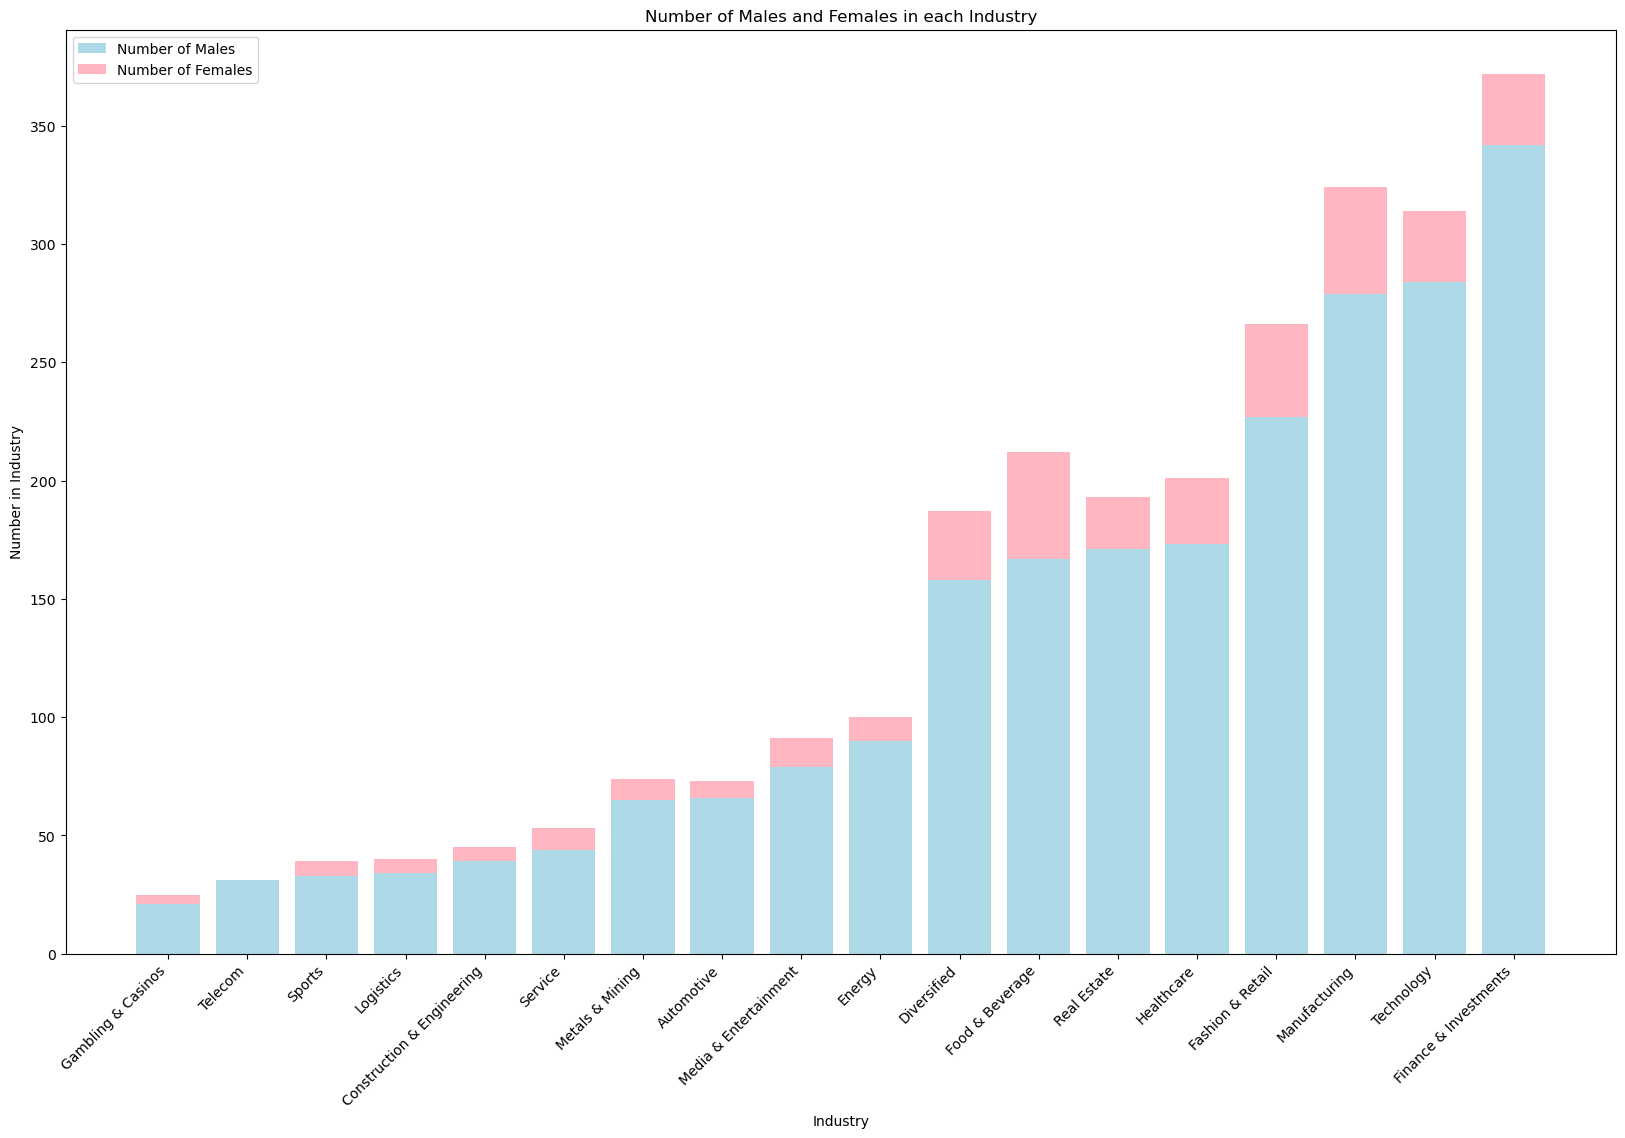

In [84]:
plt.figure(figsize=(20,12))
plt.bar(df1['category'], df1['M'], color = 'lightblue')
plt.bar(df1['category'], df1['F'], color = 'lightpink', bottom = df1['M'])
plt.legend(['Number of Males','Number of Females'], loc = 'upper left')
plt.title('Number of Males and Females in each Industry')
plt.ylabel('Number in Industry')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha = 'right')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\limch\OneDrive\Desktop\Data Viz project\Billionaires Statistics Dataset.csv")

In [3]:
immigrated = df[(df['country'] != df['countryOfCitizenship'])]
immigrated

rank  finalWorth               category                    personName  \
28      29       39100              Logistics          Klaus-Michael Kuehne   
29      30       38900        Food & Beverage              Giovanni Ferrero   
37      38       33400             Automotive                    Robin Zeng   
39      40       32100            Diversified                 Len Blavatnik   
40      41       31600       Fashion & Retail              Alain Wertheimer   
...    ...         ...                    ...                           ...   
2607  2540        1000  Finance & Investments                 Stanley Motta   
2610  2540        1000        Food & Beverage  Vera Rechulski Santo Domingo   
2626  2540        1000              Logistics                 Masaru Wasami   
2629  2540        1000                 Sports                    Toto Wolff   
2630  2540        1000          Manufacturing            Franziska Wuerbser   

       age         country          city               source  \
28    85.0     Switzerland  Schindellegi             Shipping   
29    58.0         Belgium      Brussels  Nutella, chocolates   
37    54.0           China        Ningde            Batteries   
39    65.0  United Kingdom        London     Music, chemicals   
40    74.0   United States      New York               Chanel   
...    ...             ...           ...                  ...   
2607  77.0             NaN           NaN              Finance   
2610  74.0         Bermuda           NaN                 Beer   
2626  77.0             NaN           NaN            Logistics   
2629  51.0          Monaco           NaN               Sports   
2630  35.0             NaN           NaN   Kitchen appliances   

                 industries countryOfCitizenship  ... cpi_change_country  \
28                Logistics              Germany  ...                0.4   
29          Food & Beverage                Italy  ...                1.4   
37               Automotive            Hong Kong  ...                2.9   
39              Diversified        United States  ...                1.7   
40         Fashion & Retail               France  ...                7.5   
...                     ...                  ...  ...                ...   
2607  Finance & Investments               Panama  ...                NaN   
2610        Food & Beverage               Brazil  ...                NaN   
2626              Logistics                Japan  ...                NaN   
2629                 Sports              Austria  ...                NaN   
2630          Manufacturing              Germany  ...                NaN   

               gdp_country gross_tertiary_education_enrollment  \
28       $703,082,435,360                                 59.6   
29       $529,606,710,418                                 79.7   
37    $19,910,000,000,000                                 50.6   
39     $2,827,113,184,696                                 60.0   
40    $21,427,700,000,000                                 88.2   
...                    ...                                 ...   
2607                   NaN                                 NaN   
2610                   NaN                                 NaN   
2626                   NaN                                 NaN   
2629       $7,184,844,193                                  NaN   
2630                   NaN                                 NaN   

     gross_primary_education_enrollment_country life_expectancy_country  \
28                                        105.2                    83.6   
29                                        103.9                    81.6   
37                                        100.2                    77.0   
39                                        101.2                    81.3   
40                                        101.8                    78.5   
...                                         ...                     ...   
2607                                        N

In [4]:
immigrated = immigrated.dropna(subset=['country'])
immigrated = immigrated.dropna(subset=['countryOfCitizenship'])
immigrated

rank  finalWorth          category                    personName   age  \
28      29       39100         Logistics          Klaus-Michael Kuehne  85.0   
29      30       38900   Food & Beverage              Giovanni Ferrero  58.0   
37      38       33400        Automotive                    Robin Zeng  54.0   
39      40       32100       Diversified                 Len Blavatnik  65.0   
40      41       31600  Fashion & Retail              Alain Wertheimer  74.0   
...    ...         ...               ...                           ...   ...   
2588  2540        1000            Energy            Muhammed Aziz Khan  68.0   
2590  2540        1000       Diversified              Ihor Kolomoyskyy  60.0   
2602  2540        1000        Technology                 Apoorva Mehta  36.0   
2610  2540        1000   Food & Beverage  Vera Rechulski Santo Domingo  74.0   
2629  2540        1000            Sports                    Toto Wolff  51.0   

             country           city                    source  \
28       Switzerland   Schindellegi                  Shipping   
29           Belgium       Brussels       Nutella, chocolates   
37             China         Ningde                 Batteries   
39    United Kingdom         London          Music, chemicals   
40     United States       New York                    Chanel   
...              ...            ...                       ...   
2588       Singapore      Singapore                     Power   
2590         Ukraine           Kiev      Banking, investments   
2602   United States  San Francisco  Grocery delivery service   
2610         Bermuda            NaN                      Beer   
2629          Monaco            NaN                    Sports   

            industries countryOfCitizenship  ... cpi_change_country  \
28           Logistics              Germany  ...                0.4   
29     Food & Beverage                Italy  ...                1.4   
37          Automotive            Hong Kong  ...                2.9   
39         Diversified        United States  ...                1.7   
40    Fashion & Retail               France  ...                7.5   
...                ...                  ...  ...                ...   
2588            Energy           Bangladesh  ...                0.6   
2590       Diversified               Israel  ...                7.9   
2602        Technology               Canada  ...                7.5   
2610   Food & Beverage               Brazil  ...                NaN   
2629            Sports              Austria  ...                NaN   

               gdp_country gross_tertiary_education_enrollment  \
28       $703,082,435,360                                 59.6   
29       $529,606,710,418                                 79.7   
37    $19,910,000,000,000                                 50.6   
39     $2,827,113,184,696                                 60.0   
40    $21,427,700,000,000                                 88.2   
...                    ...                                 ...   
2588     $372,062,527,489                                 84.8   
2590     $153,781,069,118                                 82.7   
2602  $21,427,700,000,000                                 88.2   
2610                   NaN                                 NaN   
2629       $7,184,844,193                                  NaN   

     gross_primary_education_enrollment_country life_expectancy_country  \
28                                        105.2                    83.6   
29                                        103.9                    81.6   
37                                        100.2                    77.0   
39                                        101.2                    81.3   
40                                        101.8                    78.5   
...                                         ...                     ...   
2588                                      100.6                    83.1   
2590              

ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap


In [37]:
immigratedGrouped = immigrated.groupby(by=["country","countryOfCitizenship"]).size().reset_index(name='Number')
immigratedGrouped 

country countryOfCitizenship  Number
0          Andorra                Spain       1
1        Australia             Malaysia       1
2        Australia               Russia       1
3        Australia        United States       1
4          Austria              Germany       3
..             ...                  ...     ...
141  United States               Taiwan       1
142  United States               Turkey       1
143  United States       United Kingdom       2
144        Uruguay            Argentina       1
145     Uzbekistan               Russia       1

[146 rows x 3 columns]

In [42]:
immigratedGrouped.head(10)

country countryOfCitizenship  Number
0    Andorra                Spain       1
1  Australia             Malaysia       1
2  Australia               Russia       1
3  Australia        United States       1
4    Austria              Germany       3
5    Austria               Russia       1
6    Bahamas            Australia       1
7    Bahamas       United Kingdom       1
8    Bahrain              Lebanon       1
9    Belgium                Italy       1

C:\Users\limch\AppData\Local\Temp\ipykernel_9120\1860032526.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145


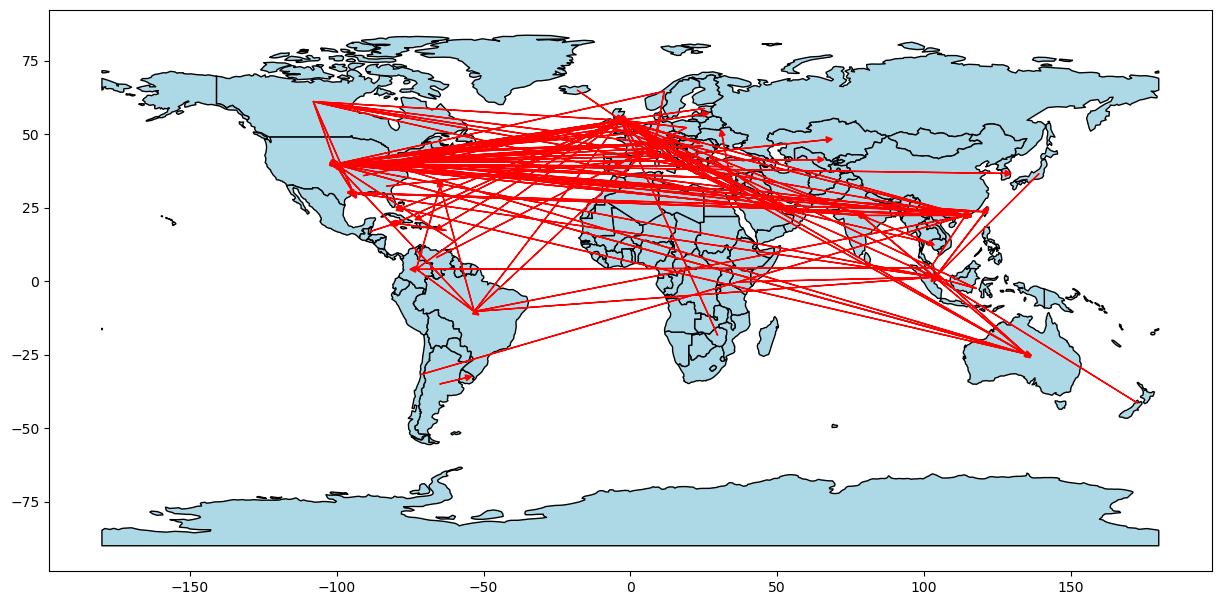

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
world.plot(figsize=(15, 10), edgecolor='black', color='lightblue')

geolocator = Nominatim(user_agent="flight_map")

# Plotting the lines between countries
for i in range(len(immigratedGrouped)):
    print(i)
    out_country = immigratedGrouped['countryOfCitizenship'].iloc[i]
    in_country = immigratedGrouped['country'].iloc[i]
    if out_country != in_country:
        location_out = geolocator.geocode(out_country)
        location_in = geolocator.geocode(in_country)
        if location_out is not None and location_in is not None:
            plt.arrow(location_out.longitude, location_out.latitude,
                      location_in.longitude - location_out.longitude, 
                      location_in.latitude - location_out.latitude,
                      head_width=2, head_length=2, fc='red', ec='red')
# Show the plot
plt.show()

C:\Users\limch\AppData\Local\Temp\ipykernel_9120\1720529102.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


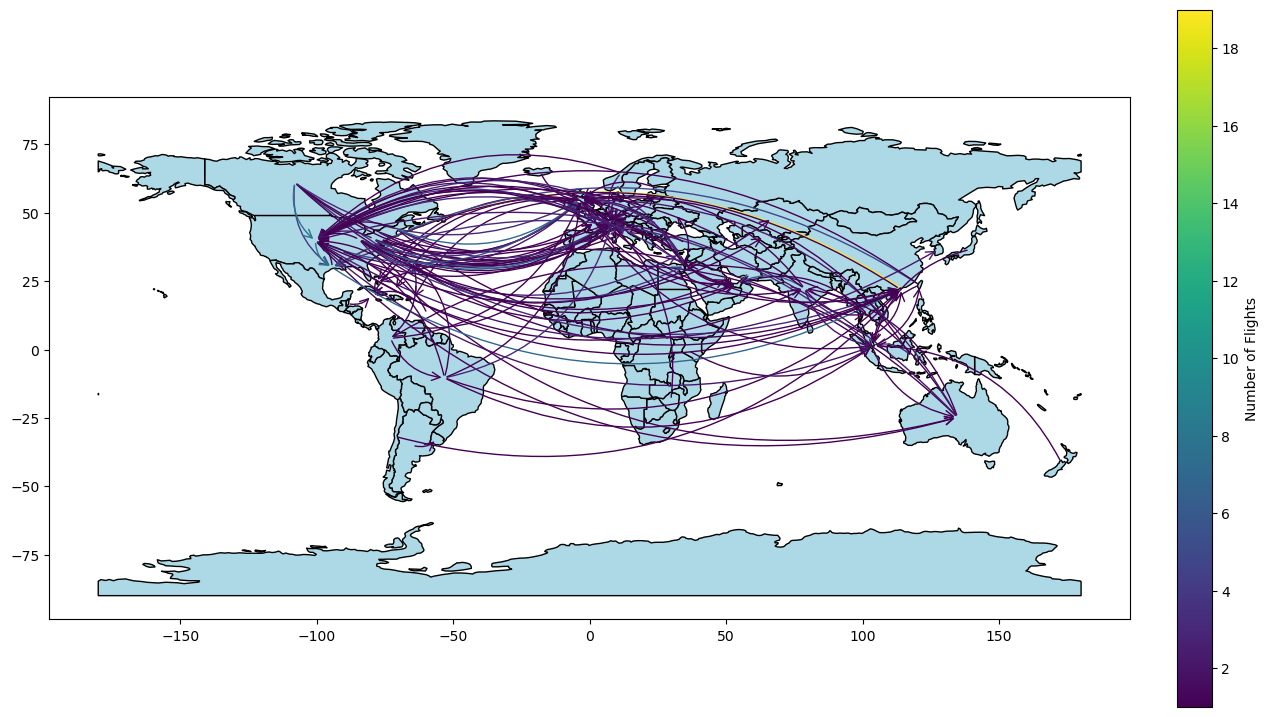

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from geopy.geocoders import Nominatim
import numpy as np
from matplotlib import colors

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, edgecolor='black', color='lightblue')

geolocator = Nominatim(user_agent="flight_map")

cmap = plt.cm.get_cmap('viridis')
normalize = colors.Normalize(vmin=immigratedGrouped['Number'].min(), vmax=immigratedGrouped['Number'].max())

# Plotting the lines between countries
for i in range(len(immigratedGrouped)):
    out_country = immigratedGrouped['countryOfCitizenship'].iloc[i]
    in_country = immigratedGrouped['country'].iloc[i]
    num_flights = immigratedGrouped['Number'].iloc[i]
    if out_country != in_country:
        location_out = geolocator.geocode(out_country)
        location_in = geolocator.geocode(in_country)
        if location_out is not None and location_in is not None:
            arrow = FancyArrowPatch((location_out.longitude, location_out.latitude),
                                    (location_in.longitude, location_in.latitude),
                                    connectionstyle="arc3,rad=0.3", 
                                    arrowstyle='->', 
                                    mutation_scale=15, 
                                    color=cmap(normalize(num_flights)))
            ax.add_patch(arrow)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Number of Flights')

plt.show()

In [52]:
immigratedGroupedDropped = immigratedGrouped.loc[immigratedGrouped['Number'] != 1]
immigratedGroupedDropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 143
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               50 non-null     object
 1   countryOfCitizenship  50 non-null     object
 2   Number                50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


C:\Users\limch\AppData\Local\Temp\ipykernel_9120\1725047231.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


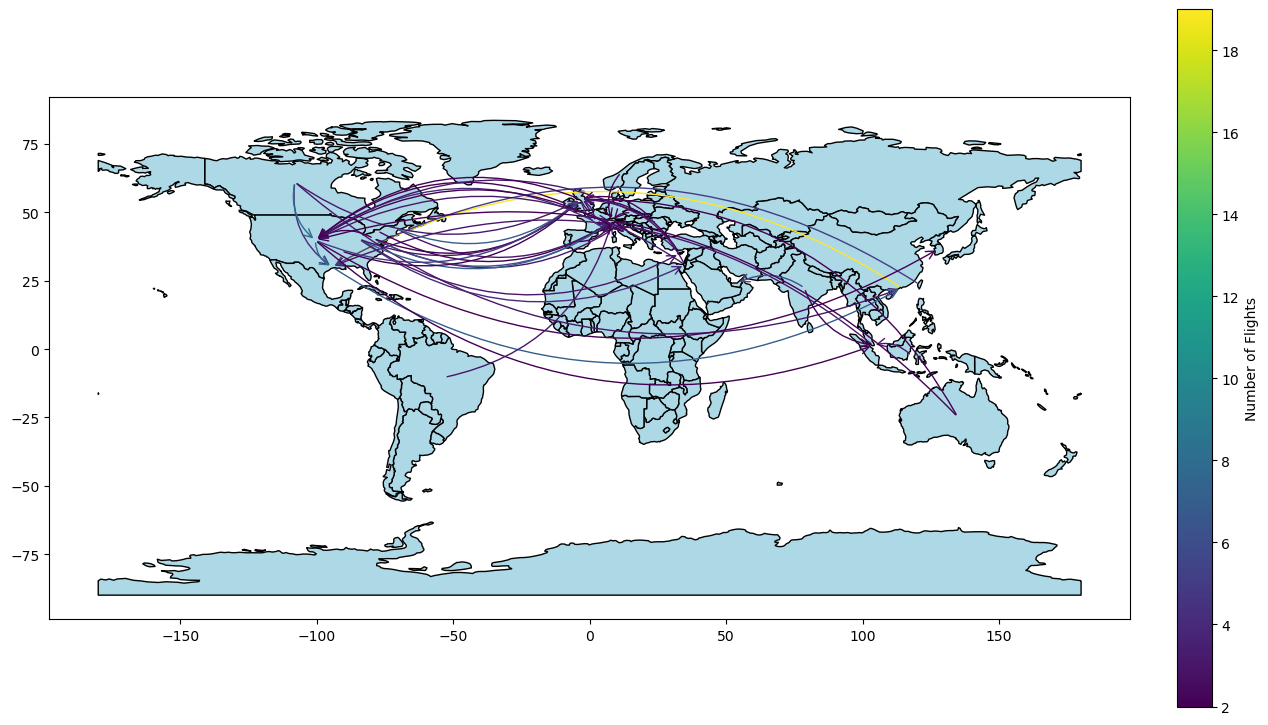

In [53]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, edgecolor='black', color='lightblue')

geolocator = Nominatim(user_agent="flight_map")

cmap = plt.cm.get_cmap('viridis')
normalize = colors.Normalize(vmin=immigratedGroupedDropped['Number'].min(), vmax=immigratedGroupedDropped['Number'].max())

# Plotting the lines between countries
for i in range(len(immigratedGroupedDropped)):
    out_country = immigratedGroupedDropped['countryOfCitizenship'].iloc[i]
    in_country = immigratedGroupedDropped['country'].iloc[i]
    num_flights = immigratedGroupedDropped['Number'].iloc[i]
    if out_country != in_country:
        location_out = geolocator.geocode(out_country)
        location_in = geolocator.geocode(in_country)
        if location_out is not None and location_in is not None:
            arrow = FancyArrowPatch((location_out.longitude, location_out.latitude),
                                    (location_in.longitude, location_in.latitude),
                                    connectionstyle="arc3,rad=0.3", 
                                    arrowstyle='->', 
                                    mutation_scale=15, 
                                    color=cmap(normalize(num_flights)))
            ax.add_patch(arrow)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Number of Flights')

plt.show()

In [56]:
immigratedGroupedtop10 = immigratedGrouped.sort_values('Number', ascending = False).head(10)
immigratedGroupedtop10

country countryOfCitizenship  Number
20                  China            Hong Kong      19
24                  China        United States       8
125         United States               Canada       8
118        United Kingdom               Sweden       7
82            Switzerland               Russia       7
33              Hong Kong                China       7
93   United Arab Emirates                India       6
76            Switzerland              Germany       6
23                  China               Taiwan       5
120        United Kingdom        United States       5

C:\Users\limch\AppData\Local\Temp\ipykernel_9120\1753809965.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


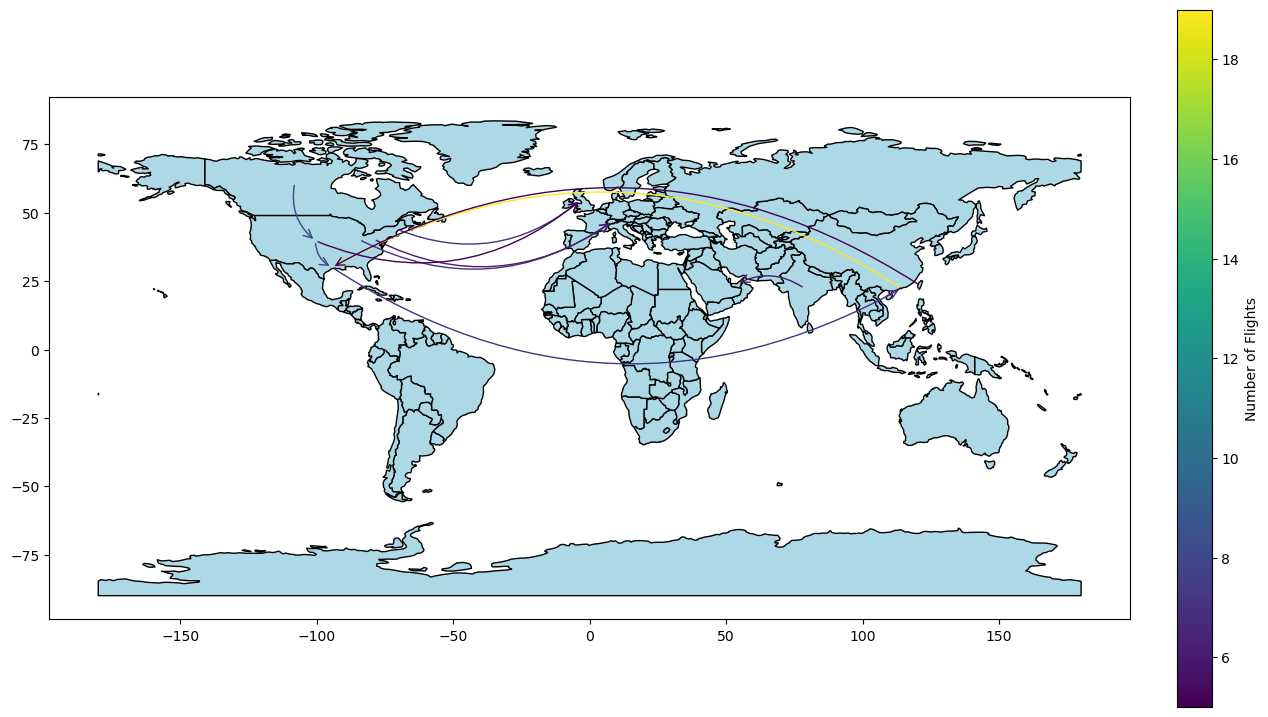

In [58]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, edgecolor='black', color='lightblue')

geolocator = Nominatim(user_agent="flight_map")

cmap = plt.cm.get_cmap('viridis')
normalize = colors.Normalize(vmin=immigratedGroupedtop10['Number'].min(), vmax=immigratedGroupedtop10['Number'].max())

# Plotting the lines between countries
for i in range(len(immigratedGroupedtop10)):
    out_country = immigratedGroupedtop10['countryOfCitizenship'].iloc[i]
    in_country = immigratedGroupedtop10['country'].iloc[i]
    num_flights = immigratedGroupedtop10['Number'].iloc[i]
    if out_country != in_country:
        location_out = geolocator.geocode(out_country)
        location_in = geolocator.geocode(in_country)
        if location_out is not None and location_in is not None:
            arrow = FancyArrowPatch((location_out.longitude, location_out.latitude),
                                    (location_in.longitude, location_in.latitude),
                                    connectionstyle="arc3,rad=0.3", 
                                    arrowstyle='->', 
                                    mutation_scale=15, 
                                    color=cmap(normalize(num_flights)))
            ax.add_patch(arrow)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Number of Flights')

plt.show()

In [80]:
immigratedGroupedTarget = immigrated.groupby(by=["country"]).size().reset_index(name='Number')
immigratedGroupedTarget10 = immigratedGroupedTarget.sort_values('Number', ascending = False).head(10)
immigratedGroupedTarget10 = immigratedGroupedTarget10.sort_values('Number',ascending = True)
immigratedGroupedTarget10

country  Number
2                Austria       4
16                Israel       5
22             Singapore      13
30  United Arab Emirates      13
21                Monaco      15
14             Hong Kong      19
11                 China      40
32         United States      41
25           Switzerland      41
31        United Kingdom      47

(0.0, 53.0)

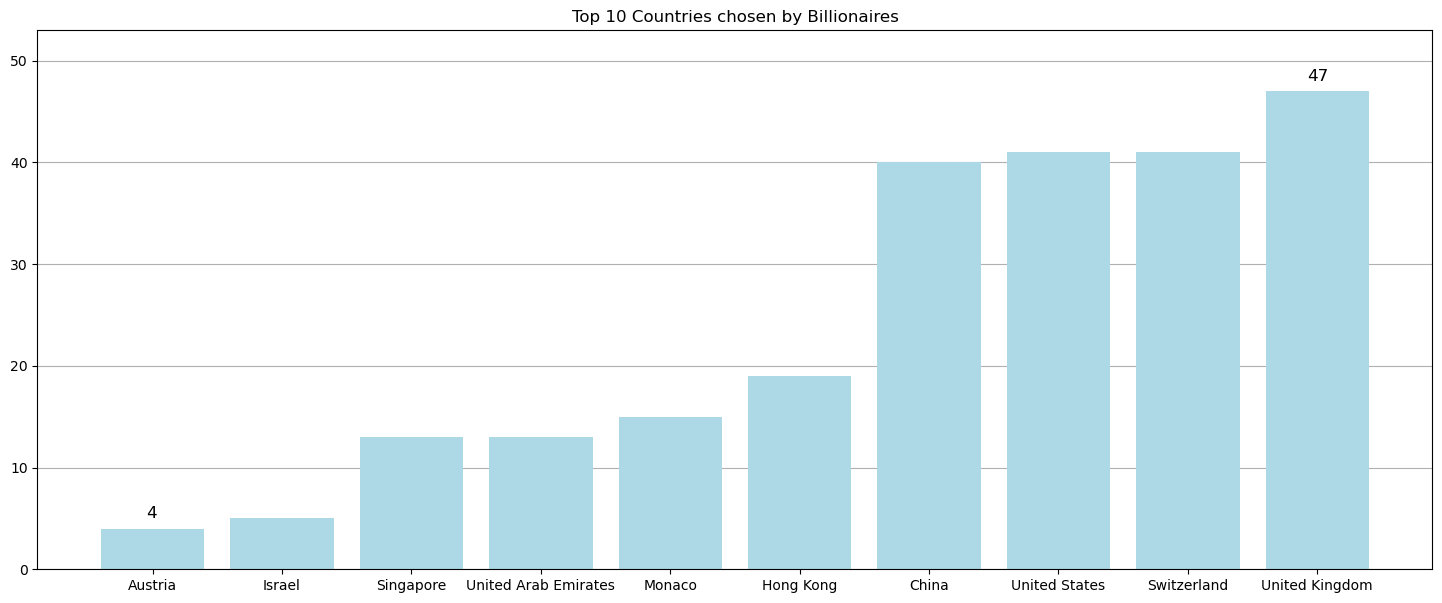

In [98]:
plt.figure(figsize=(18,7))
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis = 'y')
plt.bar(immigratedGroupedTarget10['country'],immigratedGroupedTarget10['Number'], color = 'lightblue')

plt.title("Top 10 Countries chosen by Billionaires")
plt.text(-0.05, 5, '4', size= 'large')
plt.text(8.92, 48, '47',size= 'large')
plt.ylim(0, 53)

In [100]:
immigratedGroupedLeft = immigrated.groupby(by=["countryOfCitizenship"]).size().reset_index(name='Number')
immigratedGroupedLeft10 = immigratedGroupedLeft.sort_values('Number', ascending = False).head(10)
immigratedGroupedLeft10 = immigratedGroupedLeft10.sort_values('Number',ascending = True)
immigratedGroupedLeft10

countryOfCitizenship  Number
27               Israel       9
18               France      10
24                India      12
44               Sweden      13
20              Germany      14
49       United Kingdom      15
22            Hong Kong      19
9                Canada      21
50        United States      21
40               Russia      25

In [10]:

df = px.data.tips()
fig = px.treemap(df, path=['day', 'time', 'sex'], values='total_bill')
fig.update_traces(hovertemplate='labels=%{label}<br>total_bill=%{value}<extra></extra>')
fig.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
df = pd.read_csv(r"C:\Users\limch\OneDrive\Desktop\Data Viz project\Billionaires Statistics Dataset.csv")
df

rank  finalWorth               category                personName   age  \
0        1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1        2      180000             Automotive                 Elon Musk  51.0   
2        3      114000             Technology                Jeff Bezos  59.0   
3        4      107000             Technology             Larry Ellison  78.0   
4        5      106000  Finance & Investments            Warren Buffett  92.0   
...    ...         ...                    ...                       ...   ...   
2635  2540        1000             Healthcare                   Yu Rong  51.0   
2636  2540        1000        Food & Beverage    Richard Yuengling, Jr.  80.0   
2637  2540        1000          Manufacturing             Zhang Gongyun  60.0   
2638  2540        1000            Real Estate    Zhang Guiping & family  71.0   
2639  2540        1000            Diversified               Inigo Zobel  66.0   

            country        city                        source  \
0            France       Paris                          LVMH   
1     United States      Austin                 Tesla, SpaceX   
2     United States      Medina                        Amazon   
3     United States       Lanai                        Oracle   
4     United States       Omaha            Berkshire Hathaway   
...             ...         ...                           ...   
2635          China    Shanghai                Health clinics   
2636  United States  Pottsville                          Beer   
2637          China       Gaomi  Tyre manufacturing machinery   
2638          China     Nanjing                   Real estate   
2639    Philippines      Makati                   Diversified   

                 industries countryOfCitizenship  ... cpi_change_country  \
0          Fashion & Retail               France  ...                1.1   
1                Automotive        United States  ...                7.5   
2                Technology        United States  ...                7.5   
3                Technology        United States  ...                7.5   
4     Finance & Investments        United States  ...                7.5   
...                     ...                  ...  ...                ...   
2635             Healthcare                China  ...                2.9   
2636        Food & Beverage        United States  ...                7.5   
2637          Manufacturing                China  ...                2.9   
2638            Real Estate                China  ...                2.9   
2639            Diversified          Philippines  ...                2.5   

               gdp_country gross_tertiary_education_enrollment  \
0      $2,715,518,274,227                                 65.6   
1     $21,427,700,000,000                                 88.2   
2     $21,427,700,000,000                                 88.2   
3     $21,427,700,000,000                                 88.2   
4     $21,427,700,000,000                                 88.2   
...                    ...                                 ...   
2635  $19,910,000,000,000                                 50.6   
2636  $21,427,700,000,000                                 88.2   
2637  $19,910,000,000,000                                 50.6   
2638  $19,910,000,000,000                                 50.6   
2639     $376,795,508,680                                 35.5   

     gross_primary_education_enrollment_country life_expectancy_country  \
0                                         102.5                    82.5   
1                                         101.8                    78.5   
2                                         101.8                    78.5   
3                                         101.8                    78.5   
4                                         101.8                    78.5   
...                                         ...                     ...   
2635                 

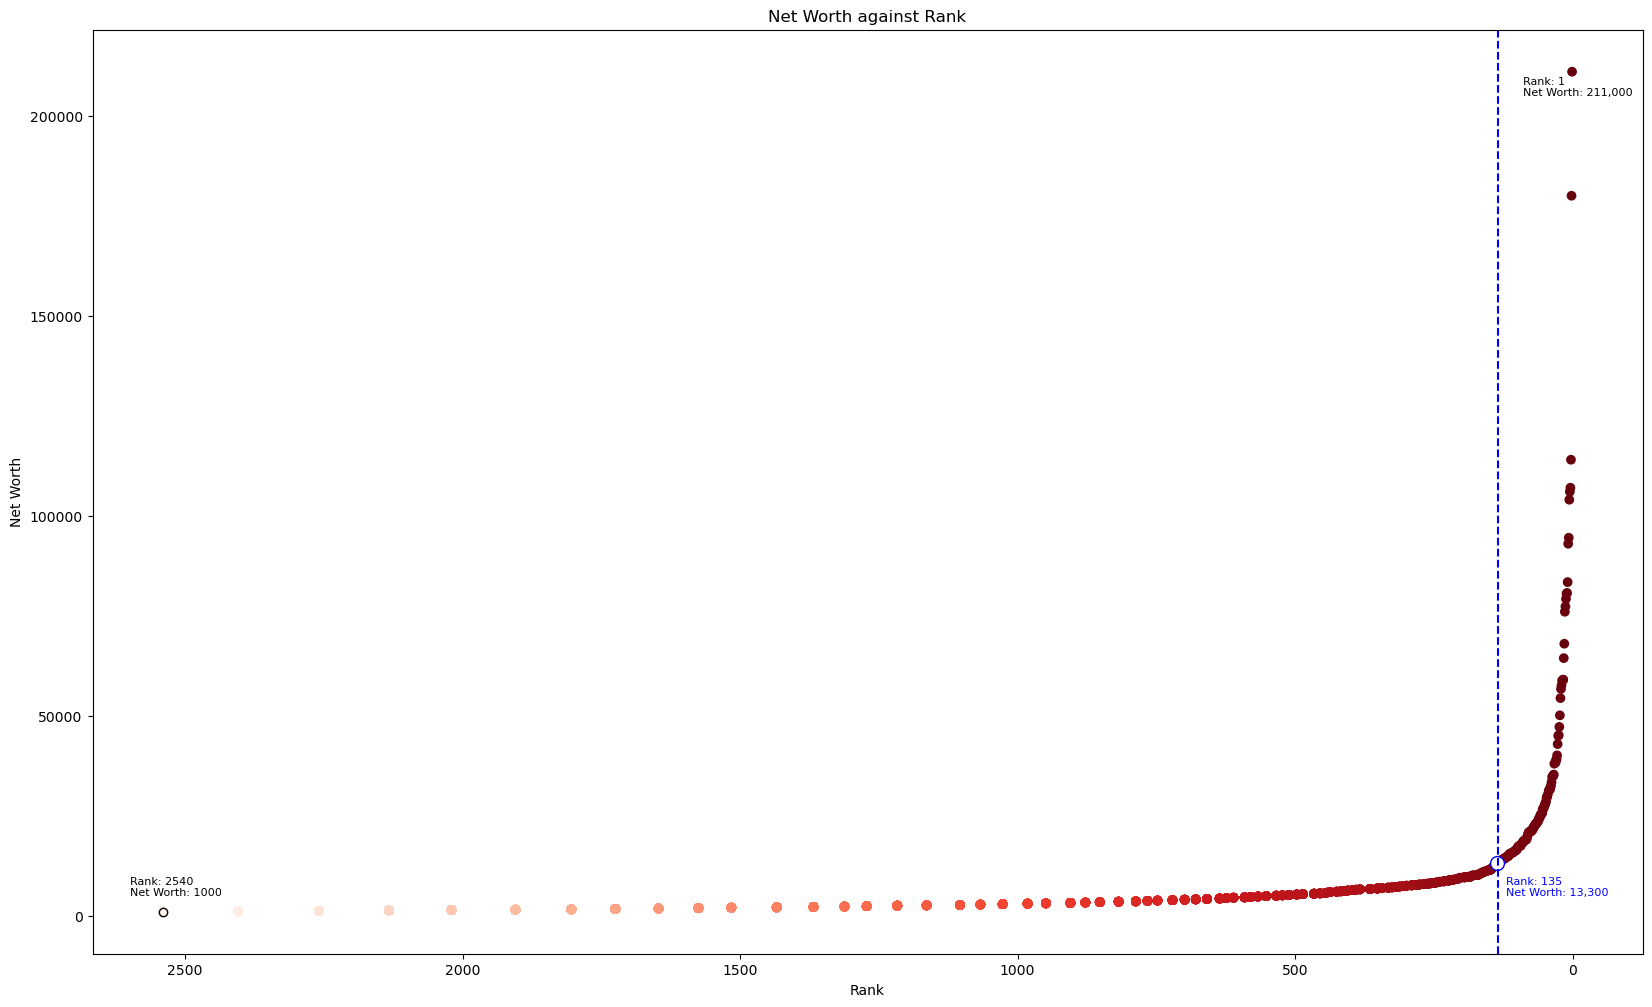

In [48]:
plt.figure(figsize=(20,12))

cmap = plt.cm.Reds

# Normalize ranks to range from 0 to 1
normalized_ranks = 1 - ((df['rank'] - df['rank'].min()) / (df['rank'].max() - df['rank'].min()))

# Create an array of RGBA values based on normalized ranks
colors = cmap(normalized_ranks)

# Create the scatter plot with customized colors
plt.scatter(df['rank'], df['finalWorth'], color=colors)

index_2540 = df[df['rank'] == 2540].index[0]

# Highlight the point with rank 2540 with a black border
plt.scatter(df['rank'][index_2540], df['finalWorth'][index_2540], color= colors[2639], edgecolor='black')
plt.scatter(df['rank'][135], df['finalWorth'][135], color= 'white', edgecolor='blue', s = 100)
# Invert the x-axis
plt.gca().invert_xaxis()

plt.title('Net Worth against Rank')
plt.ylabel('Net Worth')
plt.xlabel('Rank')

plt.axvline(x = 135, color = 'b',linestyle ='--')
#plt.text(120, 150000, 'Rank:\n135', size= 15,color = 'blue')
plt.text(2600,5000, 'Rank: 2540 \nNet Worth: 1000', size= 8,color = 'k')
plt.text(90,205000, 'Rank: 1 \nNet Worth: 211,000', size= 8,color = 'k')
plt.text(120,5000, 'Rank: 135 \nNet Worth: 13,300', size= 8,color = 'blue')
# Show the plot
plt.show()

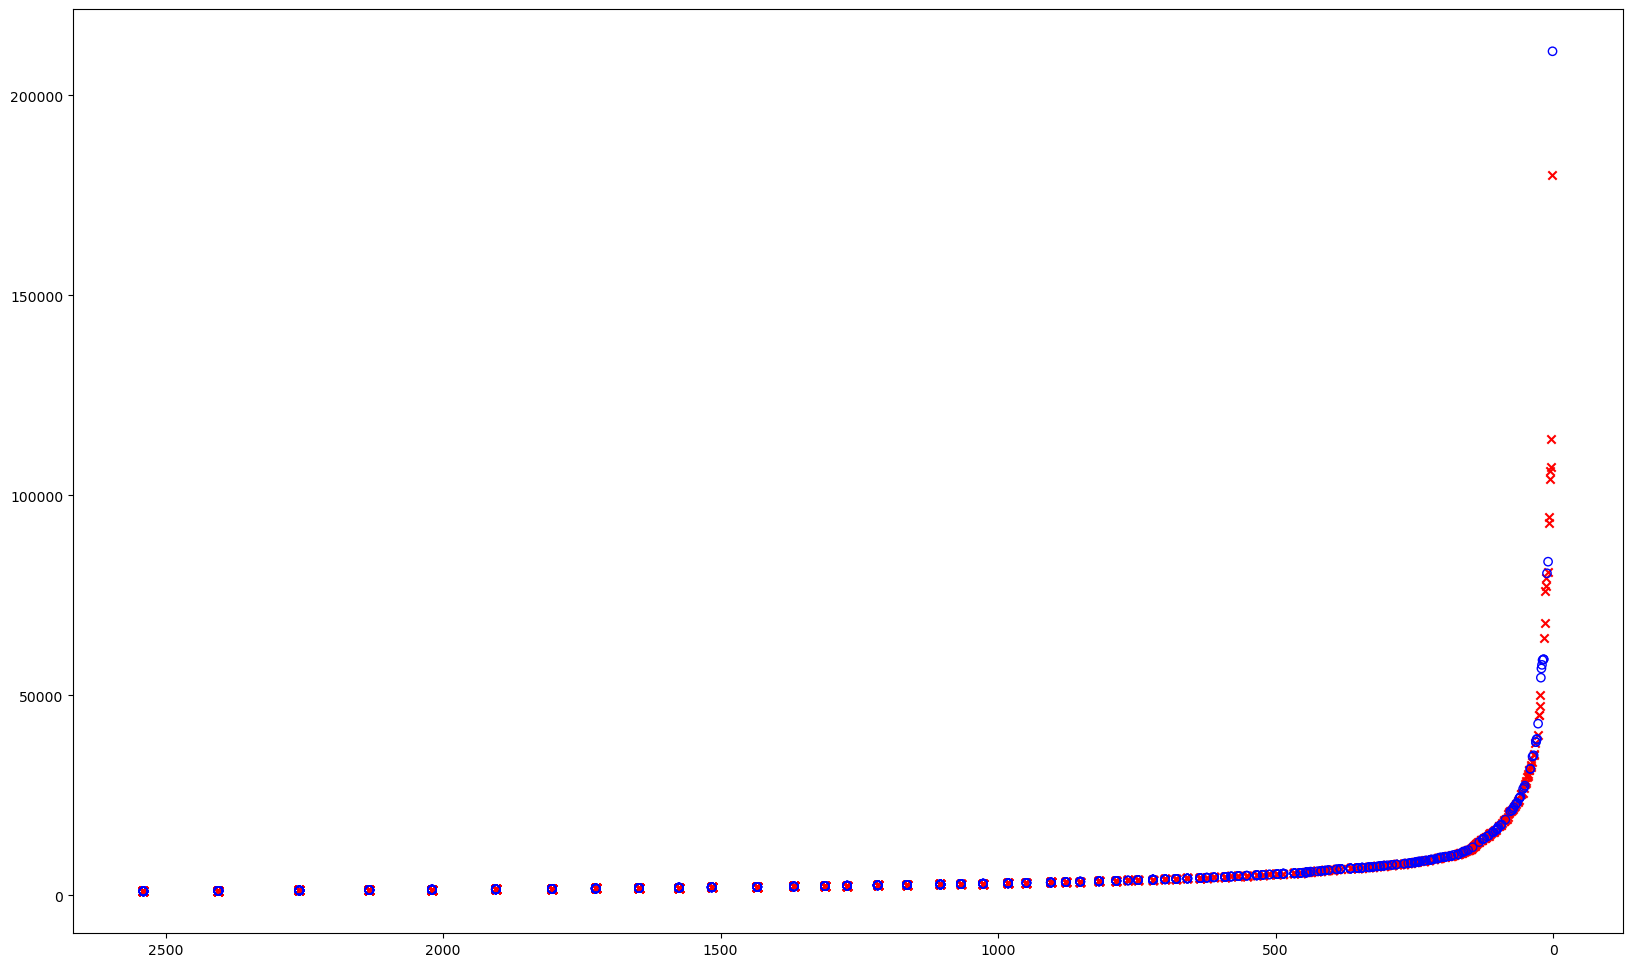

In [18]:
plt.figure(figsize=(20,12))
selfMade_true = df[df['selfMade'] == True]
selfMade_false = df[df['selfMade'] == False]

# Create a scatter plot with red dots for selfMade == True and blue dots for selfMade == False
plt.scatter(selfMade_true['rank'], selfMade_true['finalWorth'], marker = 'x', color='red', label='selfMade = True')
plt.scatter(selfMade_false['rank'], selfMade_false['finalWorth'], edgecolor='blue',facecolors ='none', label='selfMade = False')
plt.gca().invert_xaxis()

In [19]:
len(colors)

2640

In [28]:
index_2540

2539